In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(style="darkgrid")

# Предсказание стоимости футболиста АПЛ

# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

Задача: оценить стоимость футболиста АПЛ (Английская премьер лига)
Датасет - данные по футболистам АПЛ 17/18 (https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset)
Метрики качества: MAE, MSE, RMSE

# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [2]:
data = pd.read_csv('epldata_final.csv')

# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [4]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [5]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'position_cat'}>,
        <AxesSubplot:title={'center':'market_value'}>],
       [<AxesSubplot:title={'center':'page_views'}>,
        <AxesSubplot:title={'center':'fpl_value'}>,
        <AxesSubplot:title={'center':'fpl_points'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'new_foreign'}>,
        <AxesSubplot:title={'center':'age_cat'}>],
       [<AxesSubplot:title={'center':'club_id'}>,
        <AxesSubplot:title={'center':'big_club'}>,
        <AxesSubplot:title={'center':'new_signing'}>]], dtype=object)

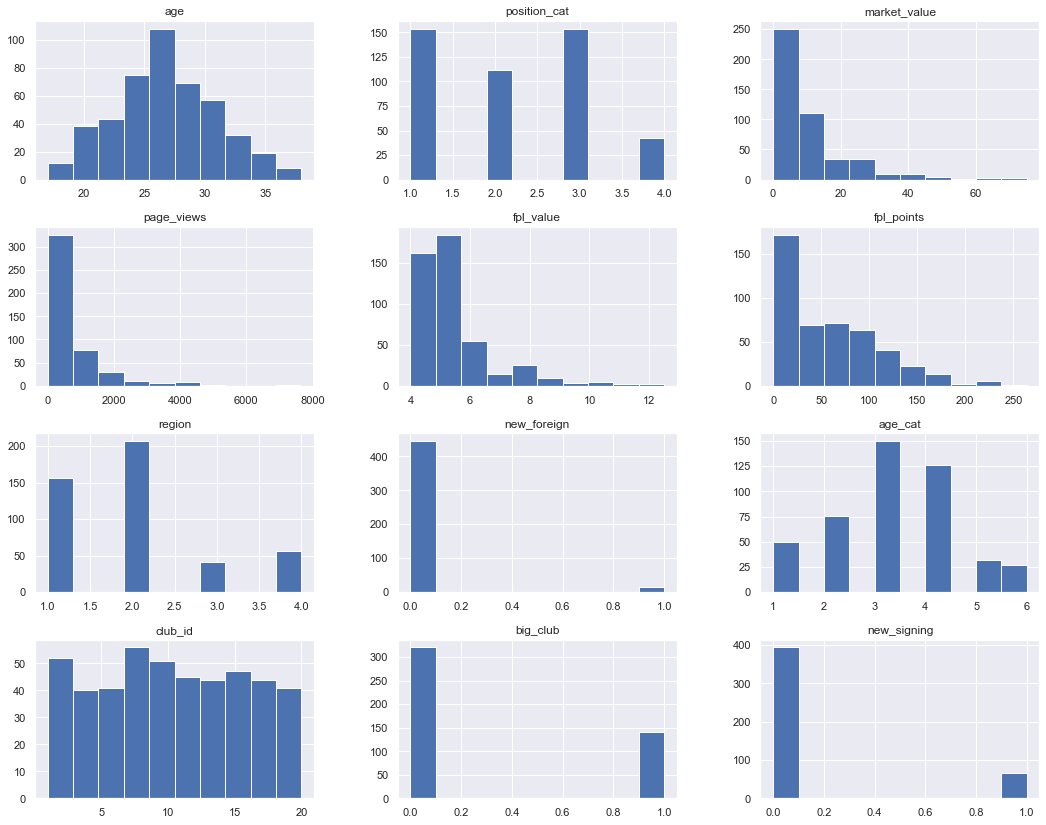

In [6]:
data.hist(figsize = (18,14.3))

In [7]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-7-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.00,0.22,-0.13,-0.05,-0.10,0.19,0.09,-0.13,0.97,-0.00,-0.12,-0.08
position_cat,0.22,1.00,-0.22,-0.28,-0.49,-0.08,-0.06,0.00,0.20,-0.02,0.02,-0.11
market_value,-0.13,-0.22,1.00,0.74,0.79,0.62,0.10,0.10,-0.12,-0.05,0.59,0.13
page_views,-0.05,-0.28,0.74,1.00,0.73,0.54,0.03,-0.05,-0.04,-0.09,0.50,0.13
fpl_value,-0.10,-0.49,0.79,0.73,1.00,0.62,0.08,0.11,-0.08,-0.06,0.42,0.10
fpl_points,0.19,-0.08,0.62,0.54,0.62,1.00,-0.01,-0.20,0.18,0.04,0.28,0.09
region,0.09,-0.06,0.10,0.03,0.08,-0.01,1.00,0.05,0.09,0.07,0.04,0.18
new_foreign,-0.13,0.00,0.10,-0.05,0.11,-0.20,0.05,1.00,-0.11,-0.00,0.08,-0.08
age_cat,0.97,0.20,-0.12,-0.04,-0.08,0.18,0.09,-0.11,1.00,-0.00,-0.11,-0.08
club_id,-0.00,-0.02,-0.05,-0.09,-0.06,0.04,0.07,-0.00,-0.00,1.00,-0.16,0.13


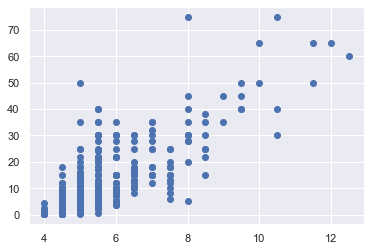

In [8]:
market_value = data[["market_value"]]
plot = plt.scatter(data['fpl_value'], market_value)
plot

In [9]:
X = data["fpl_points"].values
Y = data["market_value"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

In [10]:
def R2Score(predicted, real):
    y_mean = np.mean(real)
    sumofsquares = 0
    sumofresiduals = 0
    for i in range(len(predicted)) :
        sumofsquares += (real[i] - y_mean) ** 2
        sumofresiduals += (real[i] - predicted[i]) **2
        
    score = 1 - (sumofresiduals/sumofsquares)
    return score

In [11]:
def MAE(predicted, real):
    sum = 0
    for i in range(len(predicted)):
        sum += abs(real[i] - predicted[i])
    mae = sum / (len(predicted))
    return mae

In [12]:
def MSE(predicted, real):
    mse = 0
    for i in range(len(predicted)):
        mse += (real[i] - predicted[i]) ** 2
    return mse / len(predicted)

In [13]:
def RMSE(predicted, real):
  rmse = 0
  for i in range(len(predicted)):
      rmse += (real[i] - predicted[i]) ** 2
  rmse = np.sqrt(rmse/len(predicted))
  return rmse

# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [14]:
def predict(factors, X_data):
  m = factors[0]
  c = factors[1]
  return [c + m * x for x in X_data]

def train(X, Y):
  mean_x = np.mean(X)
  mean_y = np.mean(Y)

  n = len(X)

  numerator = 0
  denominator = 0
  for i in range(n):
      numerator += (X[i] - mean_x) * (Y[i] - mean_y)
      denominator += (X[i] - mean_x) ** 2
      
  b1 = numerator / denominator
  b0 = mean_y - (b1 * mean_x)
  return (b1, b0)

factors = train(X_train, Y_train)

# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [15]:
Y_predicted = predict(factors, X_train)
score = R2Score(Y_predicted, Y_train)
print(score)

[0.41407947]


In [16]:
print('Mean Absolute Error:', MAE(Y_train, Y_predicted))
print('Mean Squared Error:', MSE(Y_predicted, Y_train))
print('Root Mean Squared Error:', RMSE(Y_predicted, Y_train))

Mean Absolute Error: [6.66960566]
Mean Squared Error: [89.7347265]
Root Mean Squared Error: [9.47284152]


In [17]:
Y_predicted = predict(factors, X_test)
score = R2Score(Y_predicted, Y_test)
print(score)

[0.2884673]


In [18]:
print('Mean Absolute Error:', MAE(Y_test, Y_predicted))
print('Mean Squared Error:', MSE(Y_predicted, Y_test))
print('Root Mean Squared Error:', RMSE(Y_predicted, Y_test))

Mean Absolute Error: [6.9561481]
Mean Squared Error: [101.31004342]
Root Mean Squared Error: [10.06528904]


# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

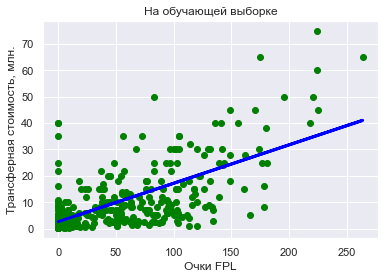

In [19]:
Y_predicted = predict(factors, X_train)
plt.scatter(X_train, Y_train, color="green")
plt.plot(X_train, predict(factors, X_train), color="blue", linewidth=3)

plt.title("На обучающей выборке")
plt.xlabel('Очки FPL')
plt.ylabel('Трансферная стоимость, млн.')
plt.show()

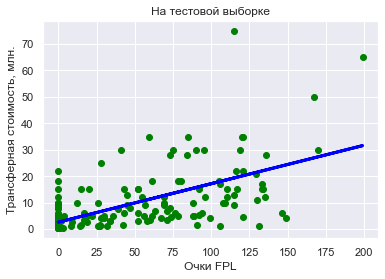

In [20]:
Y_predicted = predict(factors, X_test)
plt.scatter(X_test, Y_test, c='green')
plt.plot(X_test, Y_predicted, color='blue', linewidth=3)

plt.title("На тестовой выборке")
plt.xlabel('Очки FPL')
plt.ylabel('Трансферная стоимость, млн.')
plt.show()

# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [21]:
reg = LinearRegression()

reg = reg.fit(X_train, Y_train)

In [22]:
Y_predicted = reg.predict(X_test)
reg.score(X_test, Y_test)

0.2884672958925584

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error: 6.956148100371452
Mean Squared Error: 101.31004342061021
Root Mean Squared Error: 10.065289038105673


In [24]:
Y_predicted = reg.predict(X_train)
reg.score(X_train, Y_predicted)

1.0

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_predicted)))

Mean Absolute Error: 6.669605660687938
Mean Squared Error: 89.73472650474233
Root Mean Squared Error: 9.472841522201367


# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

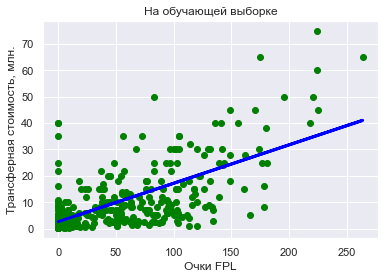

In [26]:
Y_predicted = reg.predict(X_train)
plt.scatter(X_train, Y_train, color="green")
plt.plot(X_train, reg.predict(X_train), color="blue", linewidth=3)

plt.title("На обучающей выборке")
plt.xlabel('Очки FPL')
plt.ylabel('Трансферная стоимость, млн.')
plt.show()

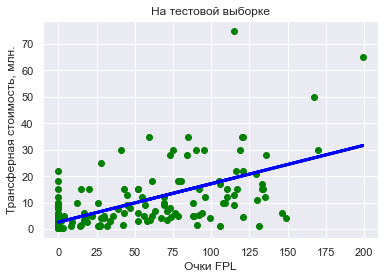

In [27]:
Y_predicted = reg.predict(X_test)
plt.scatter(X_test, Y_test, color="green")
plt.plot(X_test, Y_predicted, color="blue", linewidth=3)

plt.title("На тестовой выборке")
plt.xlabel('Очки FPL')
plt.ylabel('Трансферная стоимость, млн.')
plt.show()